 # Downloading and preparing stock data

In [20]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from preprocessing import *
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

 Preprocessing

In [21]:
df = download_data()

[features, targets, features_targets, feature_names] = create_features(df)

[X_train, X_test, y_train, y_test] = time_split(features, targets)

scaled_X_train, scaled_X_test, pred_scaler = scale_data(
    X_train, X_test, y_train.values.reshape(-1, 1))

[*********************100%***********************]  1 of 1 completed


 ## plot standardization

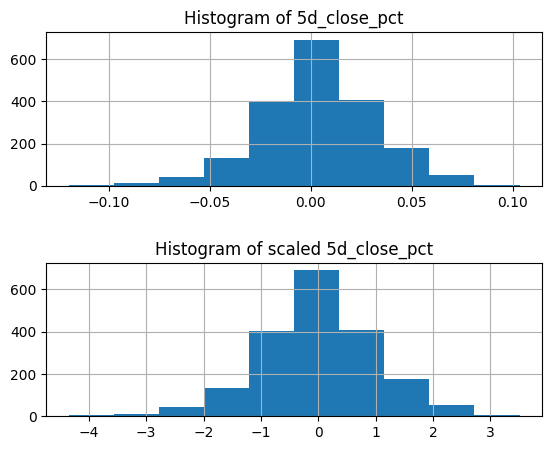

In [22]:
f, ax = plt.subplots(nrows=2, ncols=1)
X_train['5d_close_pct'].hist(ax=ax[0])
ax[0].set_title('Histogram of 5d_close_pct')

scaled_X_train['5d_close_pct'].hist(ax=ax[1])
ax[1].set_title('Histogram of scaled 5d_close_pct')

plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5)

plt.show()

 ## Neural Network Model

In [23]:
model_1 = Sequential()
model_1.add(
    Dense(100, input_dim=scaled_X_train.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_X_train, y_train, epochs=25)

Epoch 1/25
61/61 [==============================] - 1s 967us/step - loss: 0.0868
Epoch 2/25
61/61 [==============================] - 0s 968us/step - loss: 0.0081
Epoch 3/25
61/61 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 4/25
61/61 [==============================] - 0s 900us/step - loss: 0.0022
Epoch 5/25
61/61 [==============================] - 0s 875us/step - loss: 0.0019
Epoch 6/25
61/61 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 7/25
61/61 [==============================] - 0s 956us/step - loss: 0.0016
Epoch 8/25
61/61 [==============================] - 0s 892us/step - loss: 0.0015
Epoch 9/25
61/61 [==============================] - 0s 967us/step - loss: 0.0015
Epoch 10/25
61/61 [==============================] - 0s 992us/step - loss: 0.0014
Epoch 11/25
61/61 [==============================] - 0s 984us/step - loss: 0.0015
Epoch 12/25
61/61 [==============================] - 0s 925us/step - loss: 0.0022
Epoch 13/25
61/61 [==========

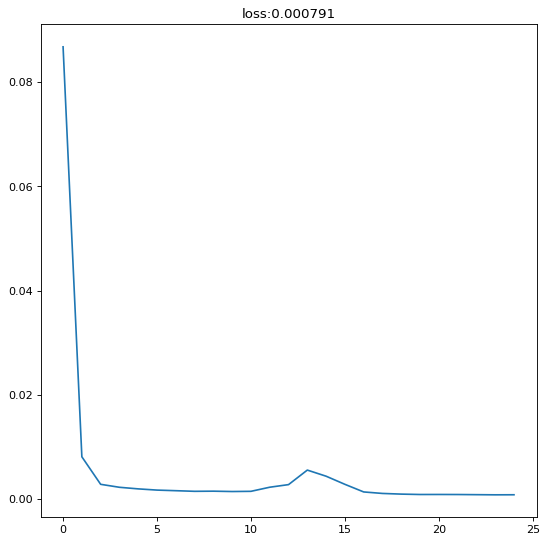

In [24]:
plt.figure(figsize=(8, 8), dpi=80)
plt.plot(history.history['loss'])
plt.title('loss:'+str(round(history.history['loss'][-1], 6)))
plt.show()

In [25]:
train_preds = model_1.predict(scaled_X_train)
test_preds = model_1.predict(scaled_X_test)

train_preds = train_preds.reshape(-1, 1)
test_preds = test_preds.reshape(-1, 1)

train_predict = pred_scaler.inverse_transform(train_preds)
test_predict = pred_scaler.inverse_transform(test_preds)

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))
print(mean_squared_error(y_train, train_preds))
print(mean_squared_error(y_test, test_preds))

11/11 [==============================] - 0s 800us/step
0.12997632895688516
-0.6174313114362429
0.0007021994785140862
0.0009191206220017801


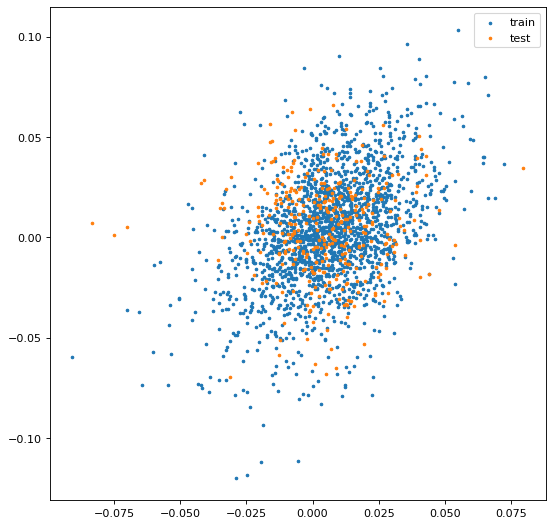

In [26]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(train_preds, y_train, label='train', s=5)
plt.scatter(test_preds, y_test, label='test', s=5)
plt.legend()
plt.show()